# Data Analysis for Households Expenditure Based on Countries and Regions
 
## Librabries used

In [1]:
#List of imports and librabaries used

import pandas as pd
import numpy as np
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
from matplotlib import pyplot

## Import CSV

In [2]:
#Import csv

A33 = pd.read_csv('A33-Household expenditure by countries and regions.csv')

A33

,Expenditure_Category,Countries,Regions,Year,Expenditure
0,Food and non-alcoholic drinks,England,North East,2015,49.9
1,Food and non-alcoholic drinks,England,Yorkshire and The Humber,2015,51.1
2,Food and non-alcoholic drinks,England,North West,2015,54.1
3,Food and non-alcoholic drinks,Wales,Wales,2015,54.2
4,Food and non-alcoholic drinks,England,West Midlands,2015,55.9
...,...,...,...,...,...
931,Transport,England,South East,2020,100.3
932,Transport,England,South West,2020,93.8
933,Transport,Wales,Wales,2020,78.1
934,Transport,Scotland,Scotland,2020,75.3


## Preprocessing

In [3]:
#Preprocessing the data

A33 = A33.replace(['Food and non-alcoholic drinks','Alcoholic drinks, tobacco and narcotics','Clothing and footwear','Housing(net) fuel and power','Household goods and services','Health','Transport','Communication','Recreation and culture','Education','Restaurants and hotels','Miscellaneous goods and services','Other expenditure items'], [1,2,3,4,5,6,7,8,9,10,11,12,13])

A33['Countries'] = A33['Countries'].replace(['England','Northern Ireland','Scotland','Wales'],[1,2,3,4])

A33['Regions'] = A33['Regions'].replace(['North East','Yorkshire and The Humber','North West','West Midlands','East Midlands','South West','East','South East','London','Northern Ireland','Scotland','Wales'],[1,2,3,4,5,6,7,8,9,10,11,12])

print(A33.info())
print(A33.describe())

A33

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Expenditure_Category  936 non-null    int64  
 1   Countries             936 non-null    int64  
 2   Regions               936 non-null    int64  
 3   Year                  936 non-null    int64  
 4   Expenditure           936 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 36.7 KB
None
       Expenditure_Category   Countries     Regions         Year  Expenditure
count            936.000000  936.000000  936.000000   936.000000   936.000000
mean               7.000000    1.500000    6.500000  2017.500000    40.889103
std                3.743658    0.957939    3.453898     1.708738    26.205535
min                1.000000    1.000000    1.000000  2015.000000     1.400000
25%                4.000000    1.000000    3.750000  2016.000000    15.800000
50%            

,Expenditure_Category,Countries,Regions,Year,Expenditure
0,1,1,1,2015,49.9
1,1,1,2,2015,51.1
2,1,1,3,2015,54.1
3,1,4,12,2015,54.2
4,1,1,4,2015,55.9
...,...,...,...,...,...
931,7,1,8,2020,100.3
932,7,1,6,2020,93.8
933,7,4,12,2020,78.1
934,7,3,11,2020,75.3


In [4]:
#Check the data frame values
print(A33['Expenditure_Category'].unique())
print(A33['Countries'].unique())
print(A33['Regions'].unique())
print(A33['Year'].unique())
print(A33['Expenditure'].unique())


[ 1  2  3  8 10  6  5  4 12 13  9 11  7]
[1 4 3 2]
[ 1  2  3 12  4 11  5  6  7  8  9 10]
[2015 2016 2017 2018 2019 2020]
[ 49.9  51.1  54.1  54.2  55.9  56.9  57.6  60.6  61.6  63.6  63.8  64.1
  11.8  13.3  12.2  12.8  11.3  11.9  10.1  12.6  11.   10.3  15.1  14.5
  11.7  12.1   9.6  12.5  10.7  14.6  15.6  10.6  12.7  12.4  10.9  11.5
   9.5  13.4  16.1  12.3  12.9  11.2  11.6  10.4  13.2  16.3  13.6  12.
  14.   14.7  13.5  13.   14.9  20.8  22.5  20.7  21.4  20.1  22.3  27.6
  25.7  21.8  22.6  22.9  36.   20.4  21.9  20.9  22.1  25.1  25.8  25.6
  20.2  21.3  21.7  37.8  23.4  23.2  22.8  25.   27.1  26.1  20.   22.
  35.6  23.   24.   23.6  23.7  25.5  27.5  27.2  22.7  30.9  24.5  21.1
  24.1  30.   21.   23.3  28.5  26.7  23.9  13.1  14.1  15.2  15.   16.9
  15.7  13.7  13.9  16.6  14.2  14.3  17.4  14.8  17.5  15.8  16.5  16.4
  18.3  17.7  16.   16.2  19.3  18.7  17.2  17.3  17.8  18.2  18.4  19.
  20.6  18.1  18.8  19.2  19.8  19.9  20.5  18.9   4.7   4.3   5.1   4.1
   7.5

## Split into smaller dataframe

In [5]:
#Split the dataframe by years

A33_2015=A33[A33['Year'] == 2015]
A33_2016=A33[A33['Year'] == 2016]
A33_2017=A33[A33['Year'] == 2017]
A33_2018=A33[A33['Year'] == 2018]
A33_2019=A33[A33['Year'] == 2019]
A33_2020=A33[A33['Year'] == 2020]

In [6]:
#Split the dataframe by expenditure category

A33_EC1=A33[A33['Expenditure_Category'] == 1]
A33_EC2=A33[A33['Expenditure_Category'] == 2]
A33_EC3=A33[A33['Expenditure_Category'] == 3]
A33_EC4=A33[A33['Expenditure_Category'] == 4]
A33_EC5=A33[A33['Expenditure_Category'] == 5]
A33_EC6=A33[A33['Expenditure_Category'] == 6]
A33_EC7=A33[A33['Expenditure_Category'] == 7]
A33_EC8=A33[A33['Expenditure_Category'] == 8]
A33_EC9=A33[A33['Expenditure_Category'] == 9]
A33_EC10=A33[A33['Expenditure_Category'] == 10]
A33_EC11=A33[A33['Expenditure_Category'] == 11]
A33_EC12=A33[A33['Expenditure_Category'] == 12]
A33_EC13=A33[A33['Expenditure_Category'] == 13]

In [7]:
#Split the dataframe by Regions

A33_R1=A33[A33['Regions'] == 1]
A33_R2=A33[A33['Regions'] == 2]
A33_R3=A33[A33['Regions'] == 3]
A33_R4=A33[A33['Regions'] == 4]
A33_R5=A33[A33['Regions'] == 5]
A33_R6=A33[A33['Regions'] == 6]
A33_R7=A33[A33['Regions'] == 7]
A33_R8=A33[A33['Regions'] == 8]
A33_R9=A33[A33['Regions'] == 9]

In [8]:
#Split the dataframe by Countries

A33_C1=A33[A33['Countries'] == 1]
A33_C2=A33[A33['Countries'] == 2]
A33_C3=A33[A33['Countries'] == 3]
A33_C4=A33[A33['Countries'] == 4]

## Check Outliers

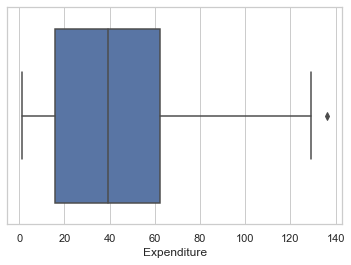

In [9]:
#Boxplot to see is there any outlier 

import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=A33["Expenditure"])

#Presence of one outlier found

## Overall Visualisation

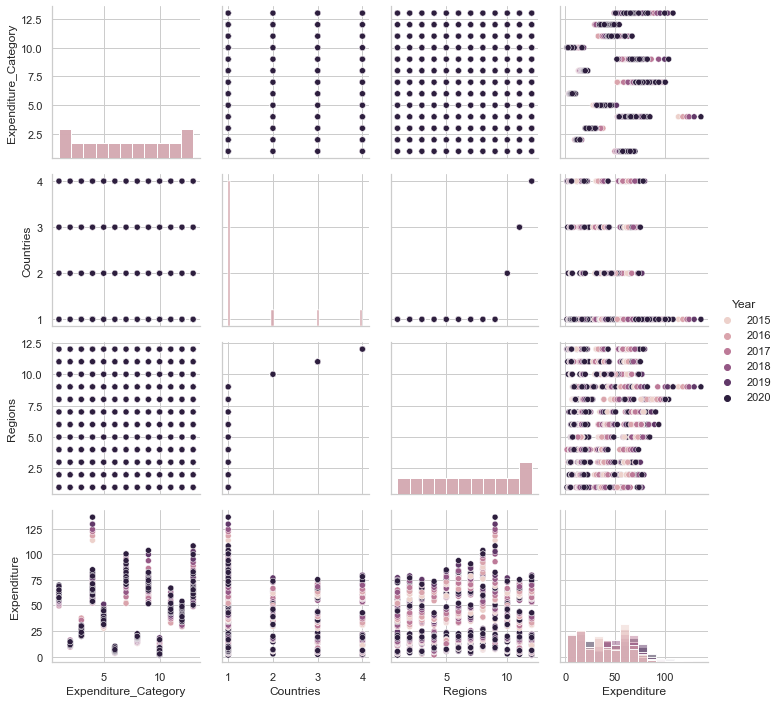

In [10]:
#Get the overall scatterplot visualisation

g = sns.PairGrid(A33, hue="Year")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend(title="Year", adjust_subtitles=True)

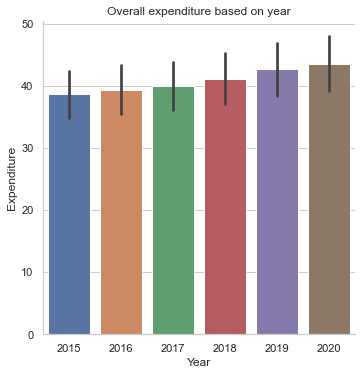

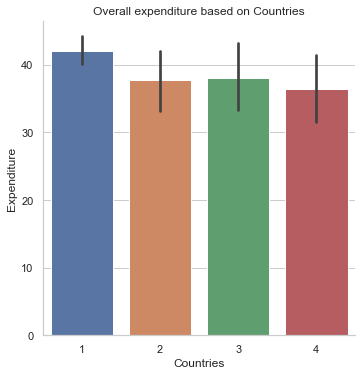

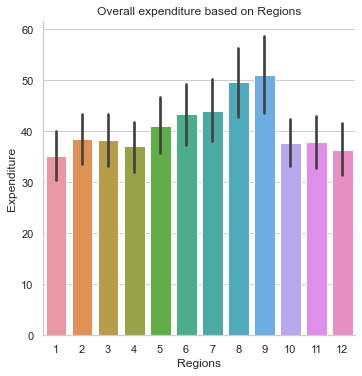

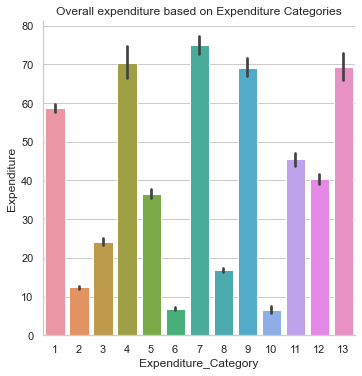

In [11]:
#Overall expenditure based on Year, Regions,Countries and Expenditure Categories

sns.catplot(x="Year", y="Expenditure", data=A33, kind="bar").set(title="Overall expenditure based on year")

sns.catplot(x="Countries", y="Expenditure", data=A33, kind="bar").set(title="Overall expenditure based on Countries")

sns.catplot(x="Regions", y="Expenditure", data=A33, kind="bar").set(title="Overall expenditure based on Regions")

sns.catplot(x="Expenditure_Category", y="Expenditure", data=A33, kind="bar").set(title="Overall expenditure based on Expenditure Categories")


## Visualisation based on Expenditure Category

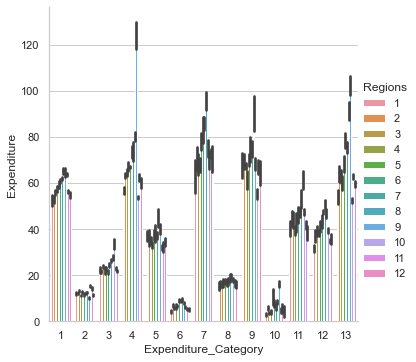

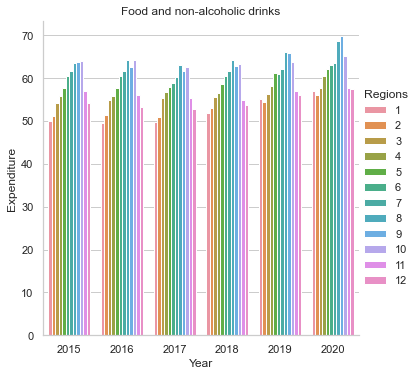

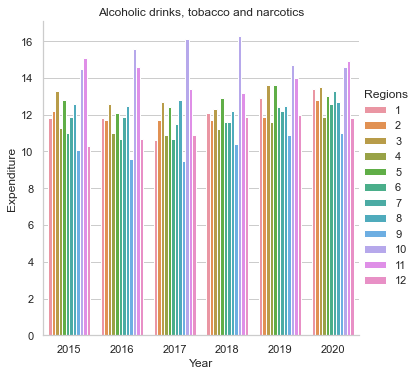

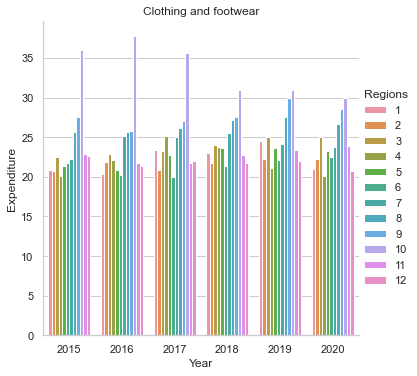

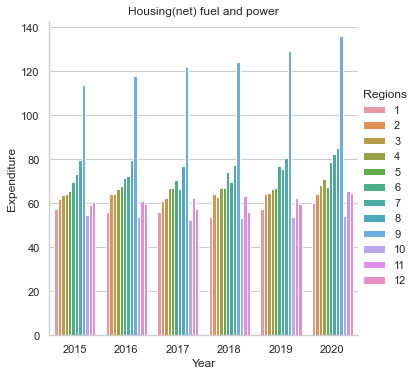

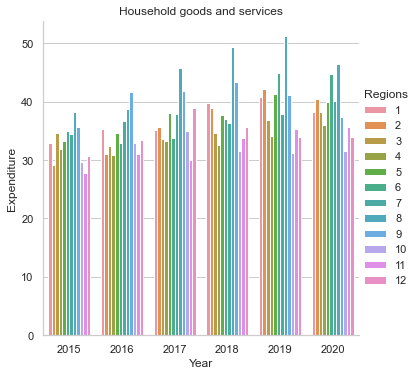

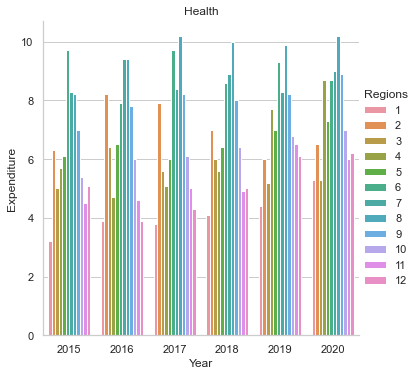

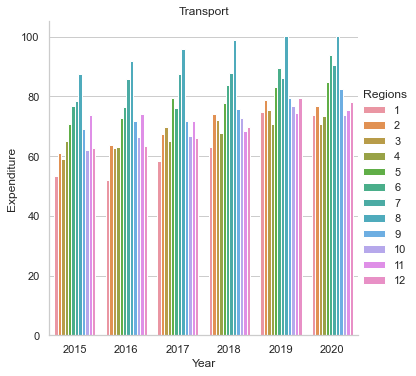

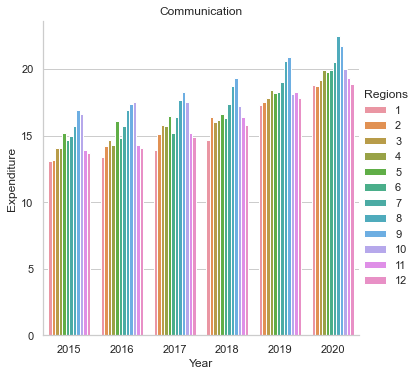

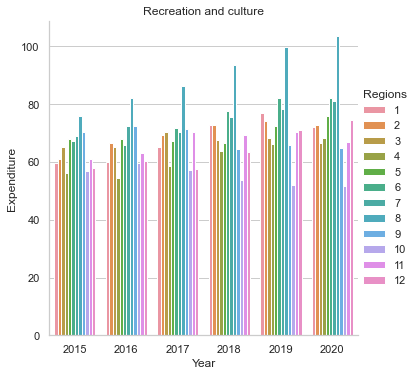

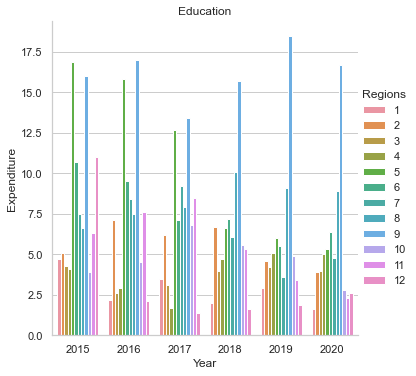

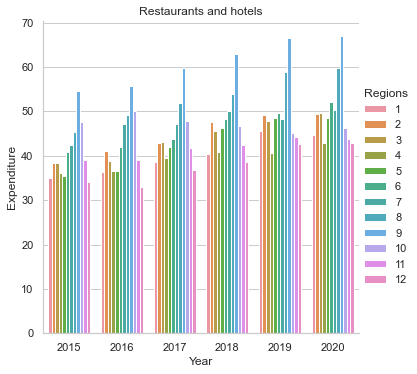

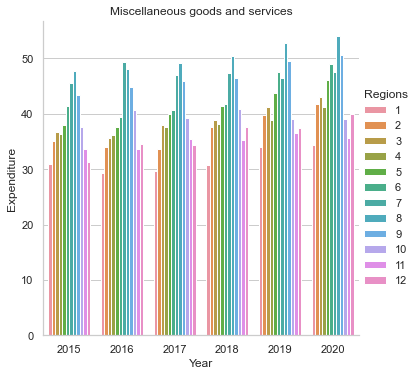

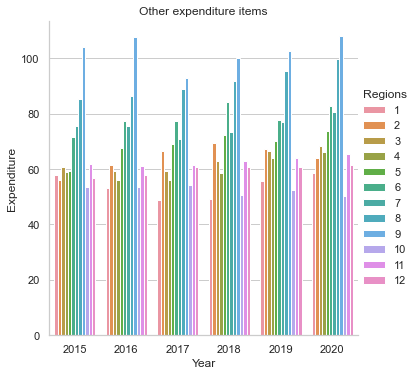

In [12]:
#Detailed Bar Charts based on expenditure category

sns.catplot(x="Expenditure_Category", y="Expenditure", hue="Regions", data=A33, kind="bar")

sns.catplot(x="Year", y="Expenditure", hue="Regions", data=A33_EC1, kind="bar").set(title='Food and non-alcoholic drinks')

sns.catplot(x="Year", y="Expenditure", hue="Regions", data=A33_EC2, kind="bar").set(title='Alcoholic drinks, tobacco and narcotics')

sns.catplot(x="Year", y="Expenditure", hue="Regions", data=A33_EC3, kind="bar").set(title='Clothing and footwear')

sns.catplot(x="Year", y="Expenditure", hue="Regions", data=A33_EC4, kind="bar").set(title='Housing(net) fuel and power')

sns.catplot(x="Year", y="Expenditure", hue="Regions", data=A33_EC5, kind="bar").set(title='Household goods and services')

sns.catplot(x="Year", y="Expenditure", hue="Regions", data=A33_EC6, kind="bar").set(title='Health')

sns.catplot(x="Year", y="Expenditure", hue="Regions", data=A33_EC7, kind="bar").set(title='Transport')

sns.catplot(x="Year", y="Expenditure", hue="Regions", data=A33_EC8, kind="bar").set(title='Communication')

sns.catplot(x="Year", y="Expenditure", hue="Regions", data=A33_EC9, kind="bar").set(title='Recreation and culture')

sns.catplot(x="Year", y="Expenditure", hue="Regions", data=A33_EC10, kind="bar").set(title='Education')

sns.catplot(x="Year", y="Expenditure", hue="Regions", data=A33_EC11, kind="bar").set(title='Restaurants and hotels')

sns.catplot(x="Year", y="Expenditure", hue="Regions", data=A33_EC12, kind="bar").set(title='Miscellaneous goods and services')

sns.catplot(x="Year", y="Expenditure", hue="Regions", data=A33_EC13, kind="bar").set(title='Other expenditure items')


Expenditure_Category         1          2       3       4          5   \
Year                                                                    
2015                  57.783333  12.241667  23.700  68.625  32.808333   
2015                  57.783333  12.241667  23.700  68.625  32.808333   
2015                  57.783333  12.241667  23.700  68.625  32.808333   
2015                  57.783333  12.241667  23.700  68.625  32.808333   
2015                  57.783333  12.241667  23.700  68.625  32.808333   
...                         ...        ...     ...     ...        ...   
2020                  61.575000  12.958333  23.975  74.825  38.550000   
2020                  61.575000  12.958333  23.975  74.825  38.550000   
2020                  61.575000  12.958333  23.975  74.825  38.550000   
2020                  61.575000  12.958333  23.975  74.825  38.550000   
2020                  61.575000  12.958333  23.975  74.825  38.550000   

Expenditure_Category        6      7          8   

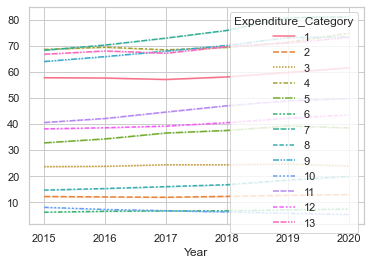

In [13]:
#Get the line chart based on Expenditure Category

order = A33['Year']
A33_wide = A33.pivot_table(index='Year', columns='Expenditure_Category', values='Expenditure')
A33_wide = A33_wide.reindex(order, axis=0)

print(A33_wide)
sns.lineplot(data=A33_wide)
plt.show()

## Visualisation based on year

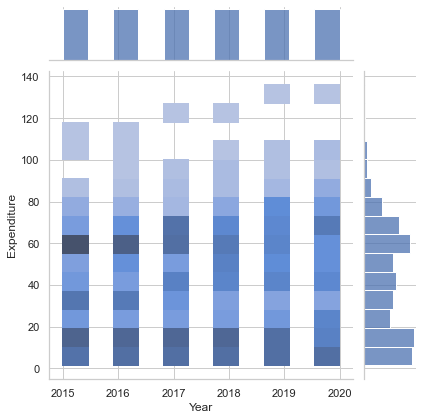

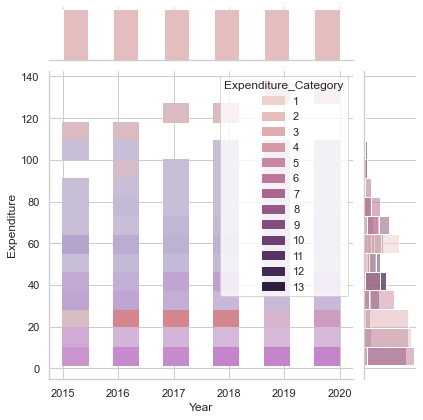

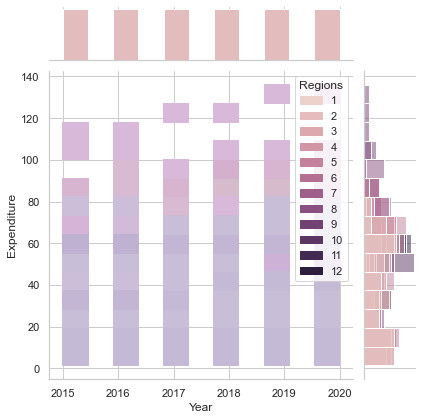

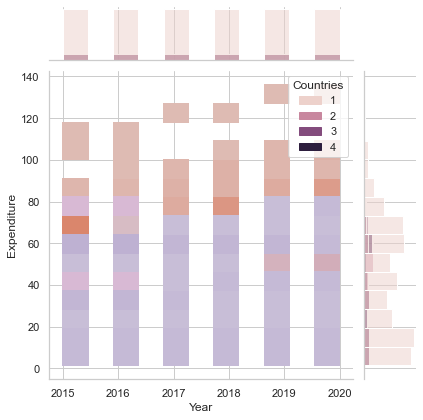

In [14]:
#Show the joint charts based on Year

sns.jointplot(x="Year", y="Expenditure", data=A33, kind="hist")

sns.jointplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A33, kind="hist")

sns.jointplot(x="Year", y="Expenditure", hue="Regions", data=A33, kind="hist")

sns.jointplot(x="Year", y="Expenditure", hue="Countries", data=A33, kind="hist")

<AxesSubplot:title={'center':'Year 2020'}, ylabel='Expenditure'>

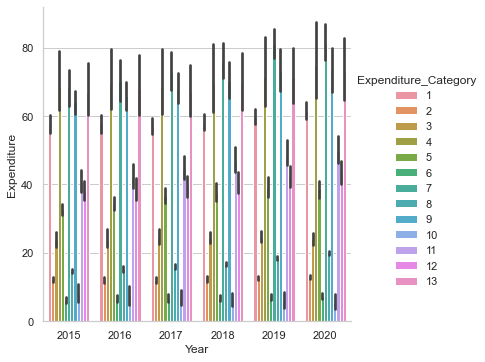

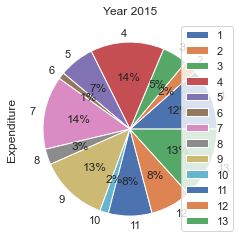

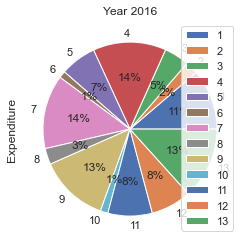

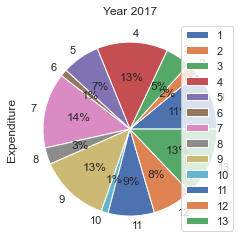

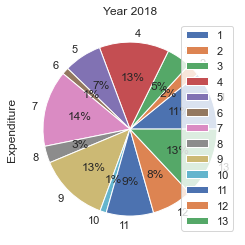

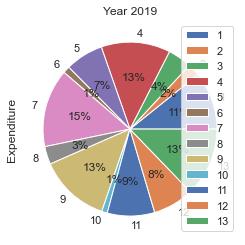

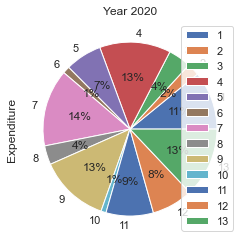

In [15]:
#Detailed Bar Charts based on years

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A33, kind="bar")

A33_2015.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2015")

A33_2016.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2016")

A33_2017.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2017")

A33_2018.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2018")

A33_2019.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2019")

A33_2020.groupby(['Expenditure_Category']).sum().plot(kind='pie', autopct='%1.0f%%', y='Expenditure',title="Year 2020")

## Visualisation based on Regions

Regions         1          2          3          4          5          6   \
Year                                                                        
2015     33.123077  34.707692  36.300000  35.369231  38.492308  40.823077   
2015     33.123077  34.707692  36.300000  35.369231  38.492308  40.823077   
2015     33.123077  34.707692  36.300000  35.369231  38.492308  40.823077   
2015     33.123077  34.707692  36.300000  35.369231  38.492308  40.823077   
2015     33.123077  34.707692  36.300000  35.369231  38.492308  40.823077   
...            ...        ...        ...        ...        ...        ...   
2020     38.407692  40.761538  40.753846  40.407692  43.607692  47.438462   
2020     38.407692  40.761538  40.753846  40.407692  43.607692  47.438462   
2020     38.407692  40.761538  40.753846  40.407692  43.607692  47.438462   
2020     38.407692  40.761538  40.753846  40.407692  43.607692  47.438462   
2020     38.407692  40.761538  40.753846  40.407692  43.607692  47.438462   

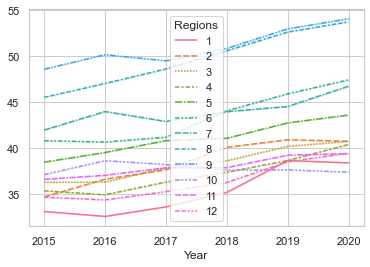

In [16]:
#Get the line chart based on Regions

order = A33['Year']
A33_wide = A33.pivot_table(index='Year', columns='Regions', values='Expenditure')
A33_wide = A33_wide.reindex(order, axis=0)

print(A33_wide)
sns.lineplot(data=A33_wide)
plt.show()

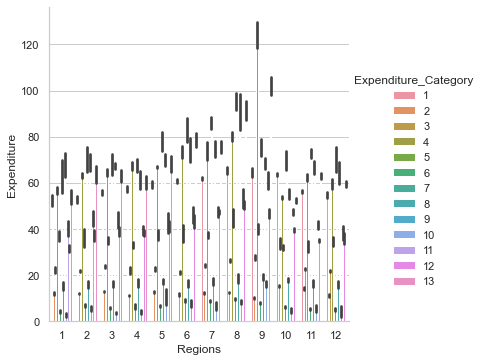

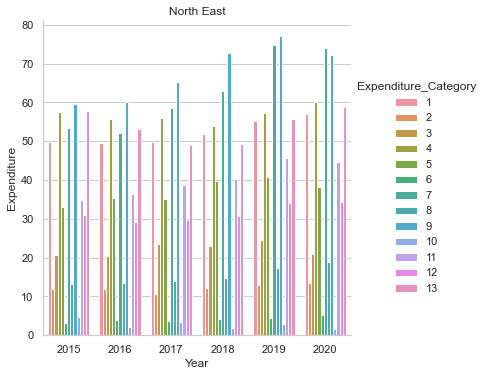

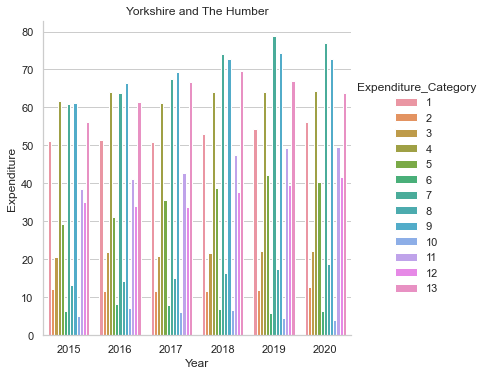

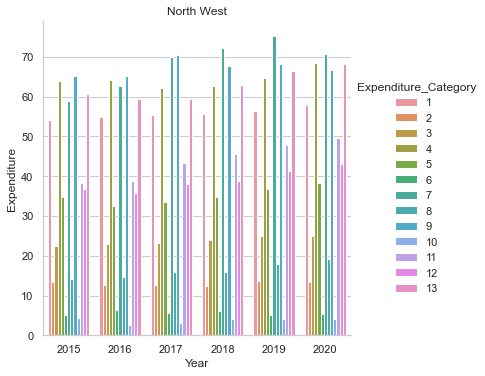

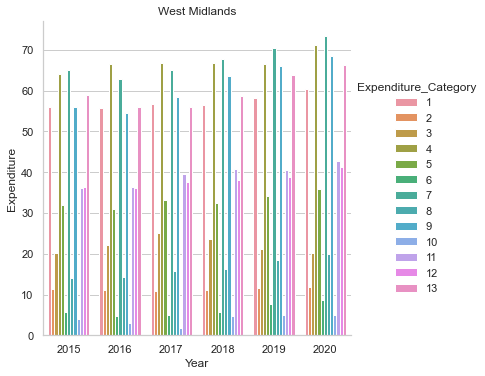

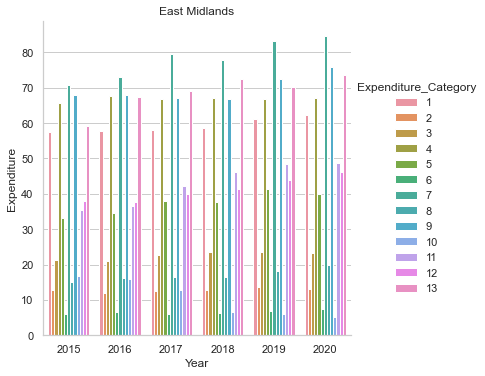

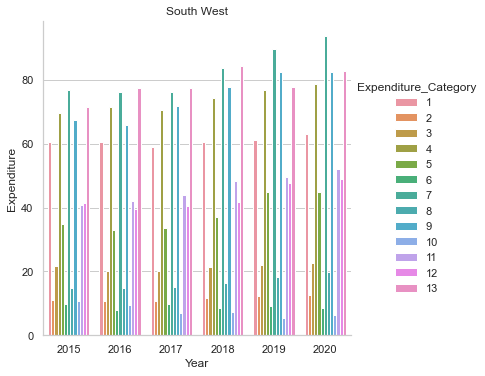

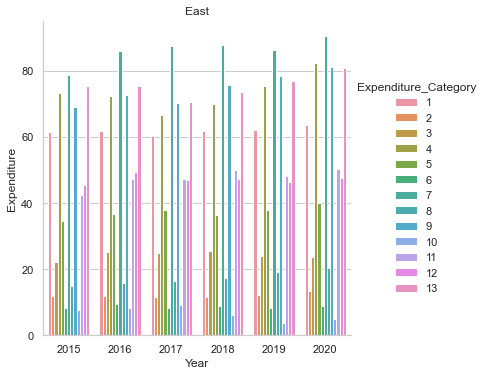

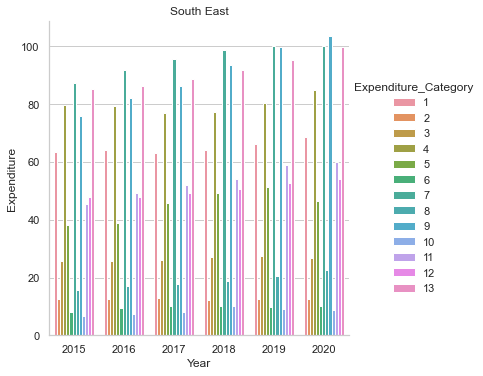

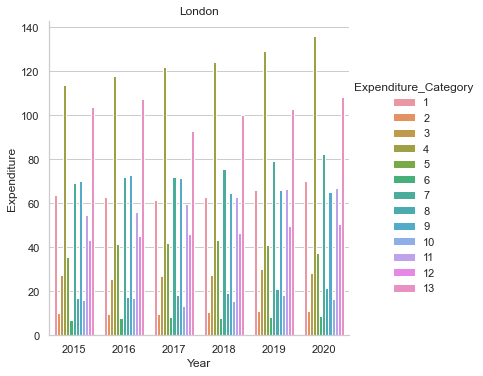

In [17]:
#Detailed Bar Charts based on Regions

sns.catplot(x="Regions", y="Expenditure", hue="Expenditure_Category", data=A33, kind="bar")

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A33_R1, kind="bar").set(title='North East')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A33_R2, kind="bar").set(title='Yorkshire and The Humber')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A33_R3, kind="bar").set(title='North West')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A33_R4, kind="bar").set(title='West Midlands')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A33_R5, kind="bar").set(title='East Midlands')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A33_R6, kind="bar").set(title='South West')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A33_R7, kind="bar").set(title='East')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A33_R8, kind="bar").set(title='South East')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A33_R9, kind="bar").set(title='London')


## Visualisation based on Regions

Countries          1          2          3          4
Year                                                 
2015       39.436752  37.130769  36.615385  34.684615
2015       39.436752  37.130769  36.615385  34.684615
2015       39.436752  37.130769  36.615385  34.684615
2015       39.436752  37.130769  36.615385  34.684615
2015       39.436752  37.130769  36.615385  34.684615
...              ...        ...        ...        ...
2020       45.105983  37.407692  39.415385  39.469231
2020       45.105983  37.407692  39.415385  39.469231
2020       45.105983  37.407692  39.415385  39.469231
2020       45.105983  37.407692  39.415385  39.469231
2020       45.105983  37.407692  39.415385  39.469231

[936 rows x 4 columns]


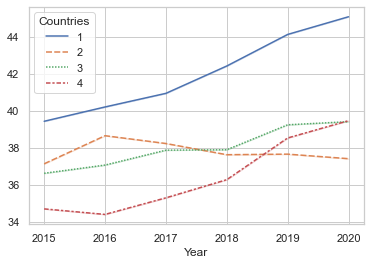

In [20]:
#Get the line chart based on Countries

order = A33['Year']
A33_wide = A33.pivot_table(index='Year', columns='Countries', values='Expenditure')
A33_wide = A33_wide.reindex(order, axis=0)

print(A33_wide)
sns.lineplot(data=A33_wide)
plt.show()

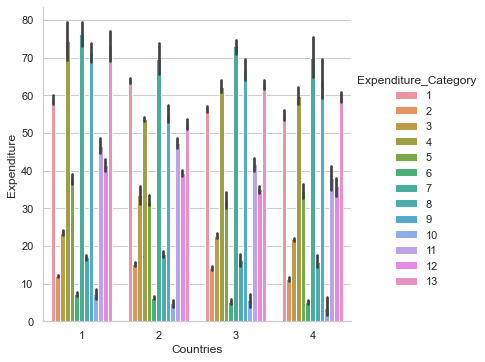

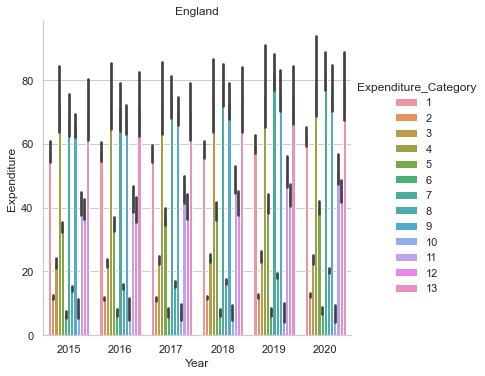

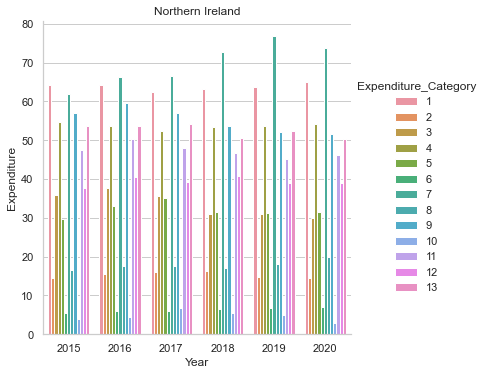

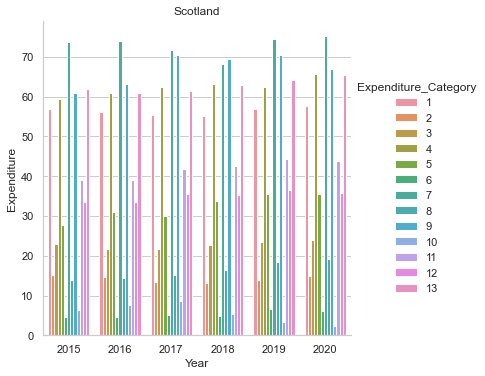

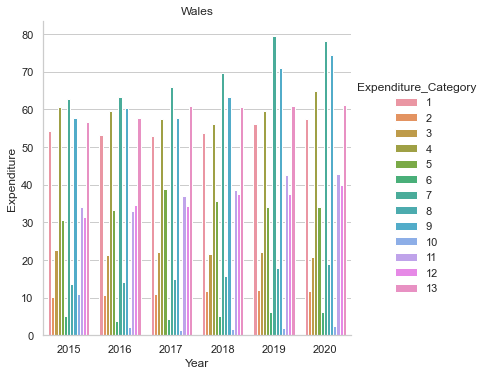

In [18]:
#Detailed Bar Charts based on Countries

sns.catplot(x="Countries", y="Expenditure", hue="Expenditure_Category", data=A33, kind="bar")

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A33_C1, kind="bar").set(title='England')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A33_C2, kind="bar").set(title='Northern Ireland')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A33_C3, kind="bar").set(title='Scotland')

sns.catplot(x="Year", y="Expenditure", hue="Expenditure_Category", data=A33_C4, kind="bar").set(title='Wales')

